<a href="https://colab.research.google.com/github/SisekoC/My-Notebooks/blob/main/Stable_Diffusion_6GB_VRAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This notebook runs the Stable Diffusion v1.4 model using HuggingFace `diffusers` library. You can run the notebook locally with as low as 6 GB of VRAM. This model is based on the [CompVis/stable-diffusion-v1-4](https://huggingface.co/CompVis/stable-diffusion-v1-4) implementation.

You just need to provide the Auth Token once for which you need a HuggingFace account.

The following few block cover the first time package installations and also the authentication process.

## Required Fist Time Installations

In [1]:
!pip install diffusers transformers huggingface-hub --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 48.5 MB/s eta 0:00:00


In [2]:
import logging
import matplotlib.pyplot as plt
import torch

from pathlib import Path
from diffusers import StableDiffusionPipeline
from huggingface_hub import notebook_login

torch.manual_seed(1)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

## Required First Time Authentication

Executing the following block the first time will show the following prompt.

![](images/huggingface-notebook-login.png)

You need to provide an authentication token once. You can find the token in by accessing your Hugginface account settings.

**`Click on the User Logo => Settings > Access Tokens`**

In case you don't have an access token, you can generate one and copy/past in the `Token` input box.

![](images/huggingface-user-access-token.png)

In [4]:
# The Auth Token Login process is needed only once when running on
# local system.
if not (Path.home()/'.huggingface'/'token').exists():
    notebook_login()

In [5]:
CONFIGS = {
    'h': 512, # Defaut height for Stbale Diffsion v-1.4.
    'w': 512, # Defaut width for Stbale Diffsion v-1.4.
    'seed': 42 # TORCH manual seed.
}

In [6]:
# We are loading the FP16 model here as that requires less memory compared to the FP32 model.
pipe = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    revision="fp16",
    torch_dtype=torch.float16,
    use_auth_token=True,
).to("cuda")

# We delete VAE encoder as we do not need it to generate images.
# This step frees up more than 2GB VRAM that allows us to run
# Stable Diffusion on a 6GB VRAM GPU.
del pipe.vae.encoder

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/543 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/pipeline_loading_utils.py:219: FutureWarning: You are loading the variant fp16 from CompVis/stable-diffusion-v1-4 via `revision='fp16'` even though you can load it via `variant=`fp16`. Loading model variants via `revision='fp16'` is deprecated and will be removed in diffusers v1. Please use `variant='fp16'` instead.
  warnings.warn(
text_encoder/model.safetensors not found


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

safety_checker/config.json:   0%|          | 0.00/4.63k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/307 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/608M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/246M [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/572 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/788 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/550 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

Keyword arguments {'use_auth_token': True} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a67

In [7]:
!ls ~/.cache/huggingface/diffusers/

ls: cannot access '/root/.cache/huggingface/diffusers/': No such file or directory


  0%|          | 0/50 [00:00<?, ?it/s]

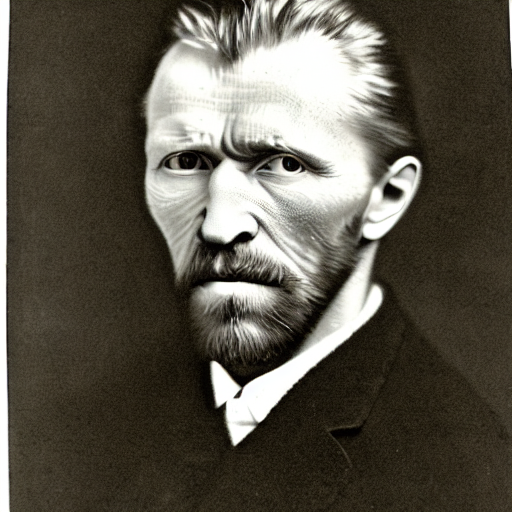

In [8]:
torch.manual_seed(CONFIGS['seed'])
prompt = "a dark, monochrome, glass negative, silver gelatine realistic, supersharp, supersharp, \
          realistic, photographic daguerrotpye portrait of vincent van gogh, shallow depth of field"
pipe(prompt, height=CONFIGS['h'], width=CONFIGS['w']).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

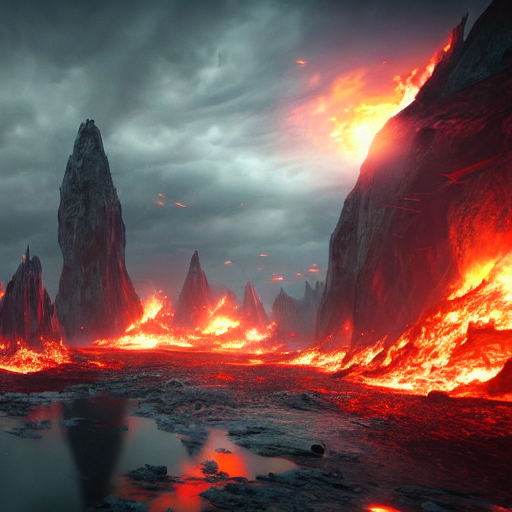

In [9]:
prompt = "A world of fire, atmospheric, hyper realistic, 8k, epic composition, \
          cinematic, octane render, artstation landscape"
pipe(prompt, height=CONFIGS['h'], width=CONFIGS['w']).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

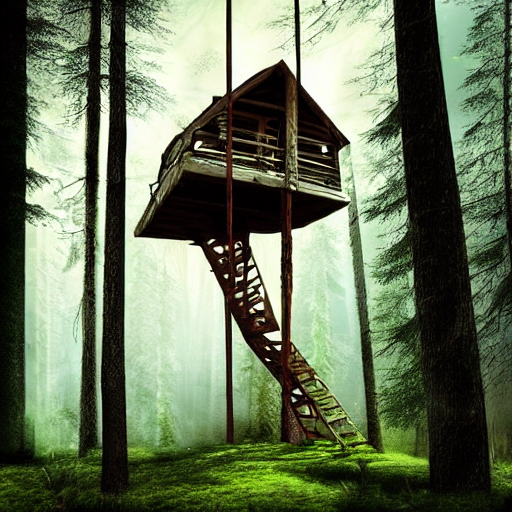

In [10]:
prompt = "tree house in the forest, atmospheric, hyper realistic, epic composition, cinematic, \
          landscape vista photography, 4k"
pipe(prompt, height=CONFIGS['h'], width=CONFIGS['w']).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

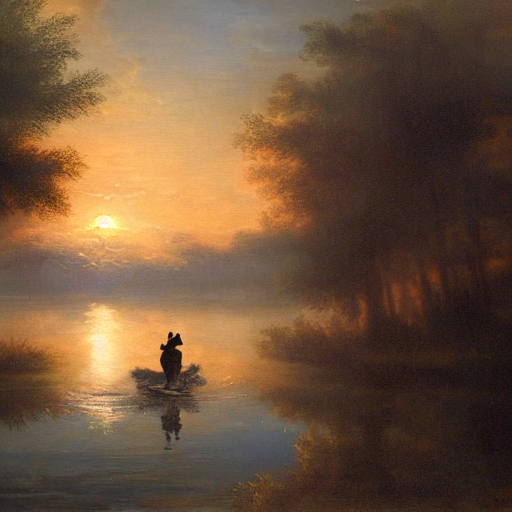

In [11]:
prompt = "a photograph of a prince riding a horse on water during sunset, oil painting \
          foggy atmosphere, cinematic"
pipe(prompt, height=CONFIGS['h'], width=CONFIGS['w']).images[0]